## 텐서플로우를 활용하여 선형 회귀 구현하기
선형 회귀란 데이터를 가장 잘 설명하는 선을 찾아 입력값에 따른 미래 결괏값을 예측하는 알고리즘입니다. 선형 회귀 직선의 수식은 다음과 같습니다.

이번 실습에서는 텐서플로우를 활용해 손실 함수와 선형 회귀 직선을 직접 구현한 후, 모델의 학습 과정을 통해 가중치(Weight)와 Bias가 어떻게 변화되는지 살펴보도록 하겠습니다. 여기서는 손실 함수로 MSE를 사용합니다. 

Epoch count 0: Loss value: 250.49554443359375
W: 1.677997350692749, b: 1.527673602104187
Epoch count 20: Loss value: 28.3988094329834
W: 3.5059425830841064, b: 1.8219205141067505
Epoch count 40: Loss value: 15.571966171264648
W: 3.942619800567627, b: 1.907819151878357
Epoch count 60: Loss value: 14.813202857971191
W: 4.045225143432617, b: 1.9435327053070068
Epoch count 80: Loss value: 14.750727653503418
W: 4.067629814147949, b: 1.9670435190200806


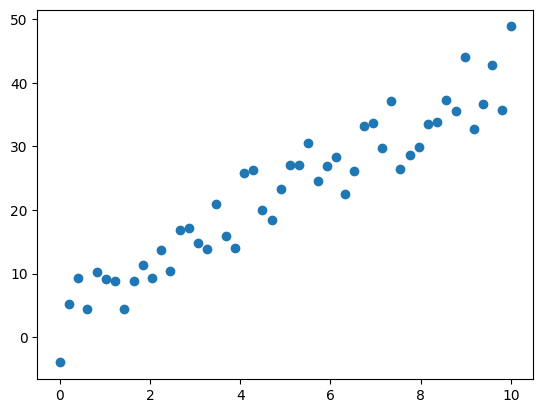

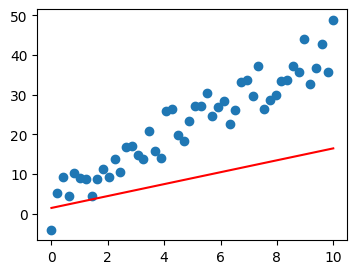

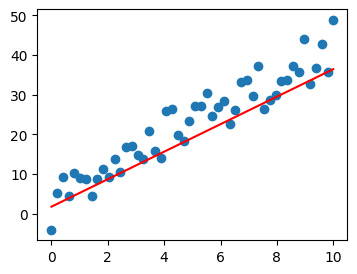

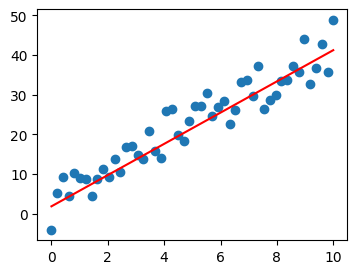

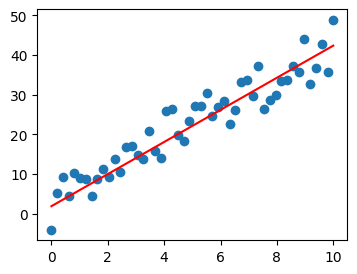

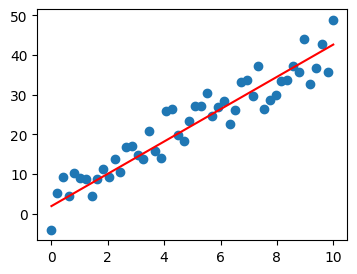

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os

np.random.seed(100)

'''
1. 선형 회귀 모델의 클래스를 구현합니다.

   Step01. 가중치 초기값을 1.5의 값을 가진 변수 텐서로 설정하세요.
   
   Step02. Bias 초기값을 1.5의 값을 가진 변수 텐서로 설정하세요.
   
   Step03. W, X, b를 사용해 선형 모델을 구현하세요.
'''

class LinearModel:
    
    def __init__(self):
        
        self.W = tf.Variable(1.5)
        
        self.b = tf.Variable(1.5)
        
    def __call__(self, X, Y):
        
        return tf.multiply(self.W, X) + self.b

'''
2. MSE 값을 계산해 반환하는 손실 함수를 완성합니다. 
'''

def loss(y, pred):
    
    return tf.reduce_mean(tf.square(y - pred))

'''
3. gradient descent 방식으로 학습하는 train 함수입니다.
   코드를 보면서 어떤 방식으로 W(가중치)와 b(Bias)이
   업데이트 되는지 확인해 보세요.
'''

def train(linear_model, x, y):
    
    with tf.GradientTape() as t:
        current_loss = loss(y, linear_model(x, y))
    
    # learning_rate 값 선언
    learning_rate = 0.001
    
    # gradient 값 계산
    delta_W, delta_b = t.gradient(current_loss, [linear_model.W, linear_model.b])
    
    # learning rate와 계산한 gradient 값을 이용하여 업데이트할 파라미터 변화 값 계산 
    W_update = (learning_rate * delta_W)
    b_update = (learning_rate * delta_b)
    
    return W_update,b_update
 
def main():
    
    # 데이터 생성
    x_data = np.linspace(0, 10, 50)
    y_data = 4 * x_data + np.random.randn(*x_data.shape)*4 + 3
    
    # 데이터 출력
    plt.scatter(x_data,y_data)
    
    # 선형 함수 적용
    linear_model = LinearModel()
    
    # epochs 값 선언
    epochs = 100
    
    # epoch 값만큼 모델 학습
    for epoch_count in range(epochs):
        
        # 선형 모델의 예측 값 저장
        y_pred_data=linear_model(x_data, y_data)
        
        # 예측 값과 실제 데이터 값과의 loss 함수 값 저장
        real_loss = loss(y_data, linear_model(x_data, y_data))
        
        # 현재의 선형 모델을 사용하여  loss 값을 줄이는 새로운 파라미터로 갱신할 파라미터 변화 값을 계산
        update_W, update_b = train(linear_model, x_data, y_data)
        
        # 선형 모델의 가중치와 Bias를 업데이트합니다. 
        linear_model.W.assign_sub(update_W)
        linear_model.b.assign_sub(update_b)
        
        # 20번 마다 출력 (조건문 변경 가능)
        if (epoch_count%20==0):
            print(f"Epoch count {epoch_count}: Loss value: {real_loss.numpy()}")
            print('W: {}, b: {}'.format(linear_model.W.numpy(), linear_model.b.numpy()))
            
            fig = plt.figure(figsize = (4,3))
            ax1 = fig.add_subplot(111)
            ax1.scatter(x_data,y_data)
            ax1.plot(x_data,y_pred_data, color='red')

if __name__ == "__main__":
    main()

## 텐서플로우와 케라스를 이용해 다층 퍼셉트론 모델을 만들기 위한 함수/메서드

- tf.keras.models.Sequential(): 연속적으로 층을 쌓아 만드는 Sequential 모델을 위한 함수
- model.complie() : 학습 방법 설정
- model.fit() : 모델 학습
- model.predict() : 학습된 모델로 예측값 생성
- tf.keras.layers.Dense(units, activation): 신경망 모델의 레이어를 구성하는데 필요한 keras 함수
- units: 레이어 안의 노드 수
- activation: 적용할 activation function

In [8]:
import tensorflow as tf
import numpy as np
import os


np.random.seed(100)
tf.random.set_seed(100)


def main():
    
    # 데이터 생성
    x_data = np.linspace(0, 10, 100)
    y_data = 1.5 * x_data**2 -12 * x_data + np.random.randn(*x_data.shape)*2 + 0.5
    
    # 신경망 모델 생성
    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, input_dim=1, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
    ])
    
    # 최적화 모델 설정
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    # 학습 시작 
    history = model.fit(x_data, y_data, epochs=500, verbose=2)
    
    # 학습된 모델을 사용하여 예측값 생성 및 저장
    predictions = model.predict(x_data)
    
    # Visualize(x_data, y_data, predictions)
    
    return history, model
    
if __name__ == '__main__':
    main()

Epoch 1/500
4/4 - 1s - loss: 301.1982 - 501ms/epoch - 125ms/step
Epoch 2/500
4/4 - 0s - loss: 299.8839 - 5ms/epoch - 1ms/step
Epoch 3/500
4/4 - 0s - loss: 298.7094 - 5ms/epoch - 1ms/step
Epoch 4/500
4/4 - 0s - loss: 297.5058 - 6ms/epoch - 1ms/step
Epoch 5/500
4/4 - 0s - loss: 296.2593 - 6ms/epoch - 1ms/step
Epoch 6/500
4/4 - 0s - loss: 295.3128 - 5ms/epoch - 1ms/step
Epoch 7/500
4/4 - 0s - loss: 294.7444 - 6ms/epoch - 1ms/step
Epoch 8/500
4/4 - 0s - loss: 294.0771 - 5ms/epoch - 1ms/step
Epoch 9/500
4/4 - 0s - loss: 293.3647 - 6ms/epoch - 2ms/step
Epoch 10/500
4/4 - 0s - loss: 292.8107 - 9ms/epoch - 2ms/step
Epoch 11/500
4/4 - 0s - loss: 292.2335 - 6ms/epoch - 1ms/step
Epoch 12/500
4/4 - 0s - loss: 291.6838 - 7ms/epoch - 2ms/step
Epoch 13/500
4/4 - 0s - loss: 291.1110 - 6ms/epoch - 1ms/step
Epoch 14/500
4/4 - 0s - loss: 290.6909 - 37ms/epoch - 9ms/step
Epoch 15/500
4/4 - 0s - loss: 290.2073 - 4ms/epoch - 997us/step
Epoch 16/500
4/4 - 0s - loss: 289.7011 - 6ms/epoch - 1ms/step
Epoch 17/5